# FPGA Coincidence Counting

Trying to count coincidences based on the FPGA counter on old datasets before it saturates.

In [1]:
# import libraries
import raadpy as rp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define some constants
raw_dir = '../../Data/RAW/'
SD      = 'SD-1124'
TIME    = 1e-3

# Plot the orbit data

An overarching view of the dataset

In [3]:
# Plot the orbit data for this run
buffer_fname    = raw_dir + SD + '/light1-'+SD+'-buff1.dat'
fname           = buffer_fname.split('/')[-1]

# Decode the buffer data in a dictionary
data_SiPM   = rp.get_dict(buffer_fname,struct=rp.ORBIT_STRUCT,condition="data['id_bit'] == 1")
data_PMT    = rp.get_dict(buffer_fname,struct=rp.ORBIT_STRUCT,condition="data['id_bit'] == 0")

Line:   0%|          | 0/1698 [00:00<?, ?it/s]

Line:   0%|          | 0/1698 [00:00<?, ?it/s]

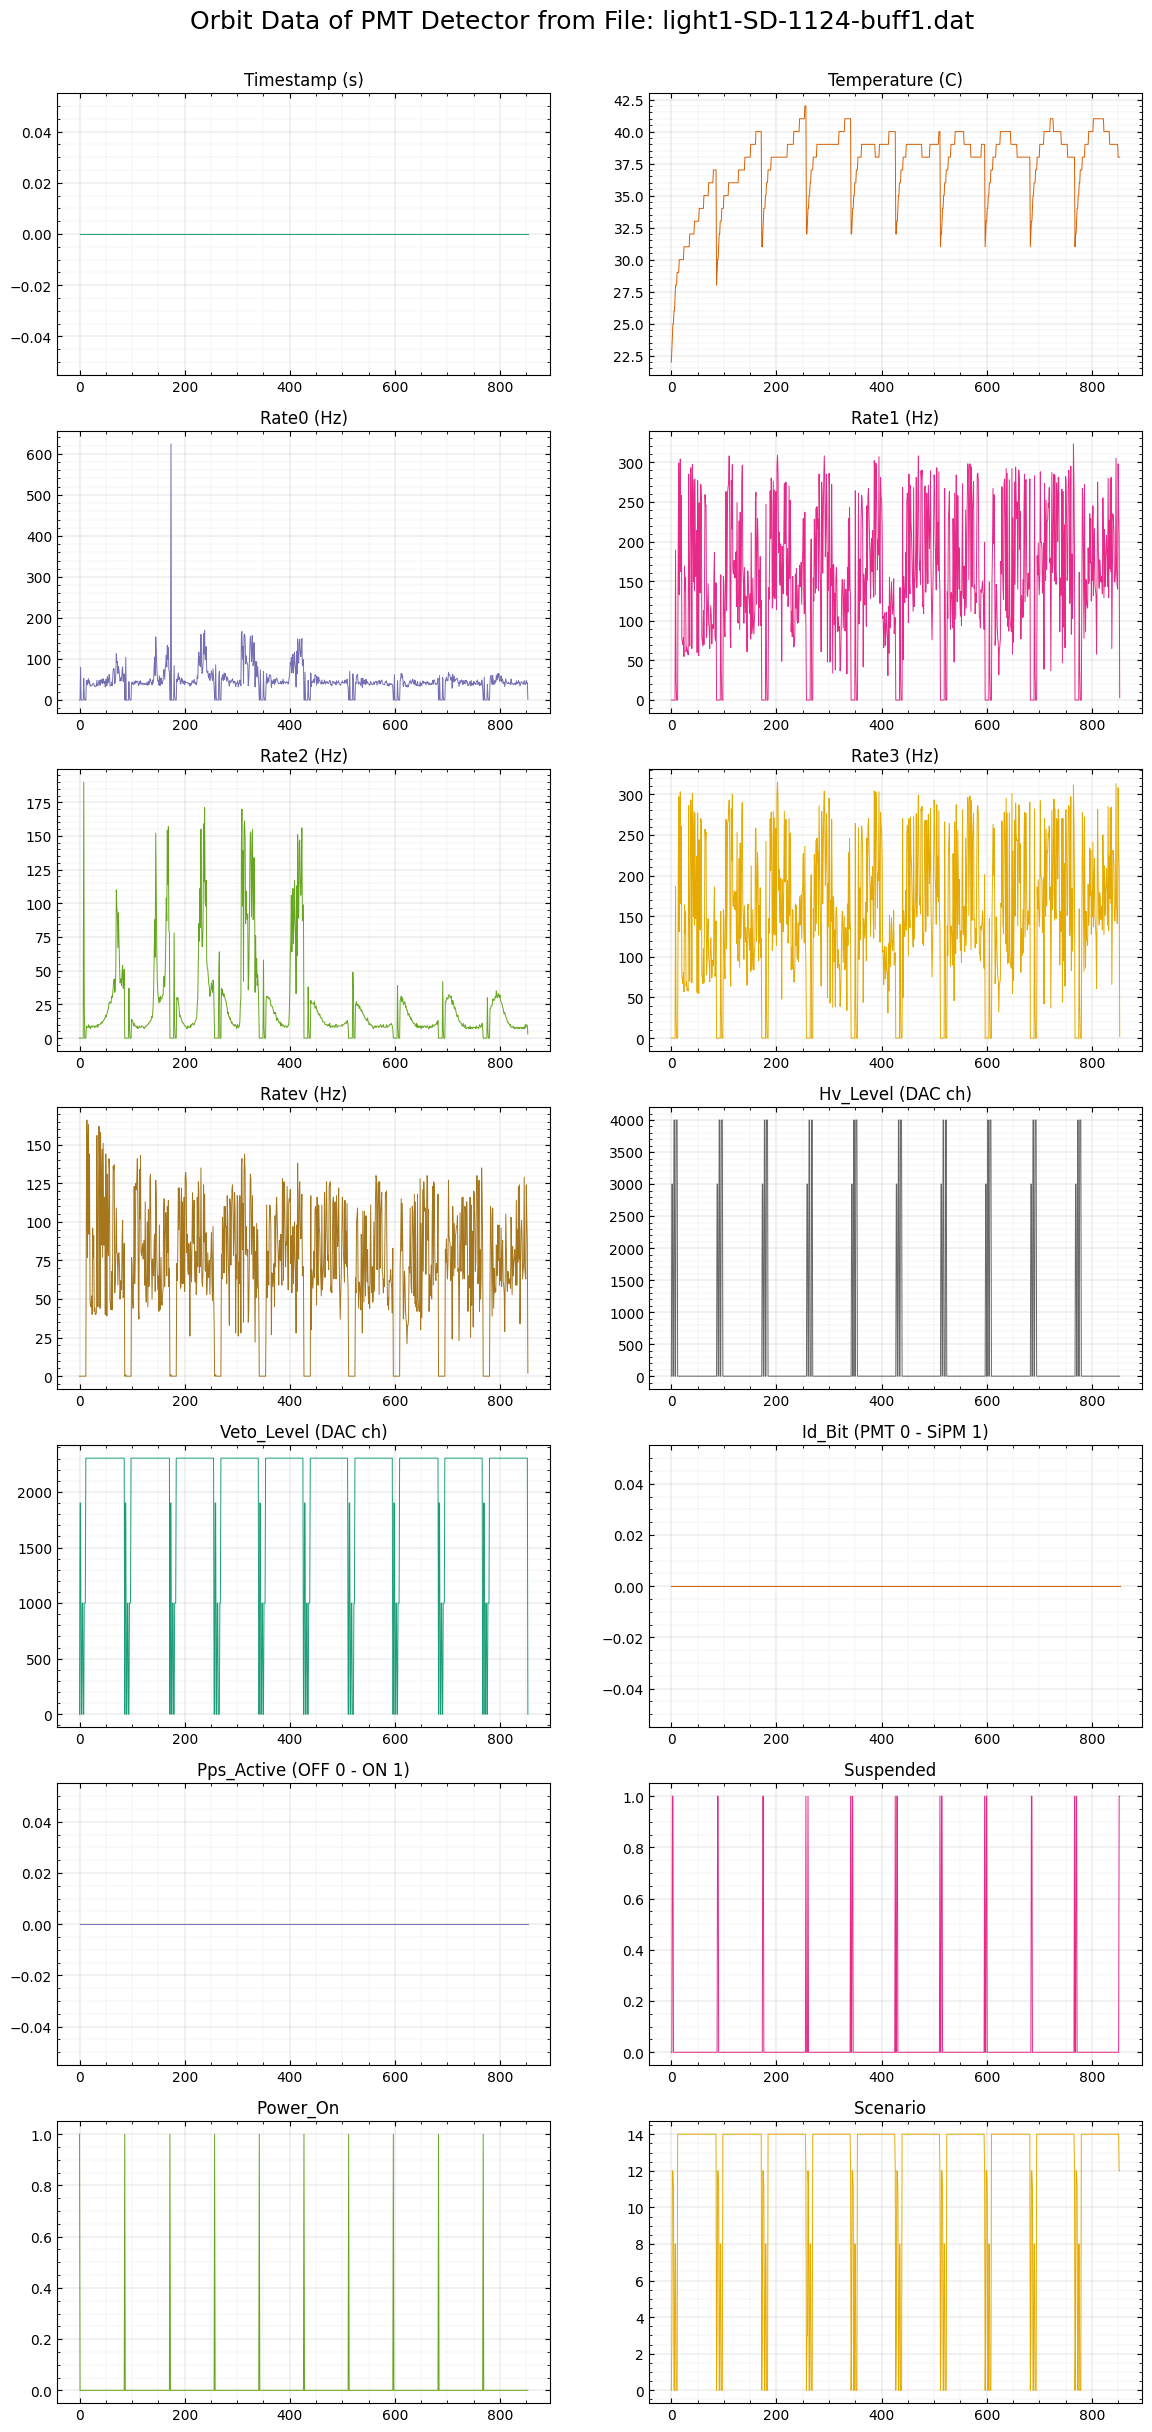

In [4]:
# PMT
fig, axes  = rp.plot_buffer(data_PMT,title = 'Orbit Data of PMT Detector from File: '+ fname,UNITS=rp.ORBIT_UNITS)

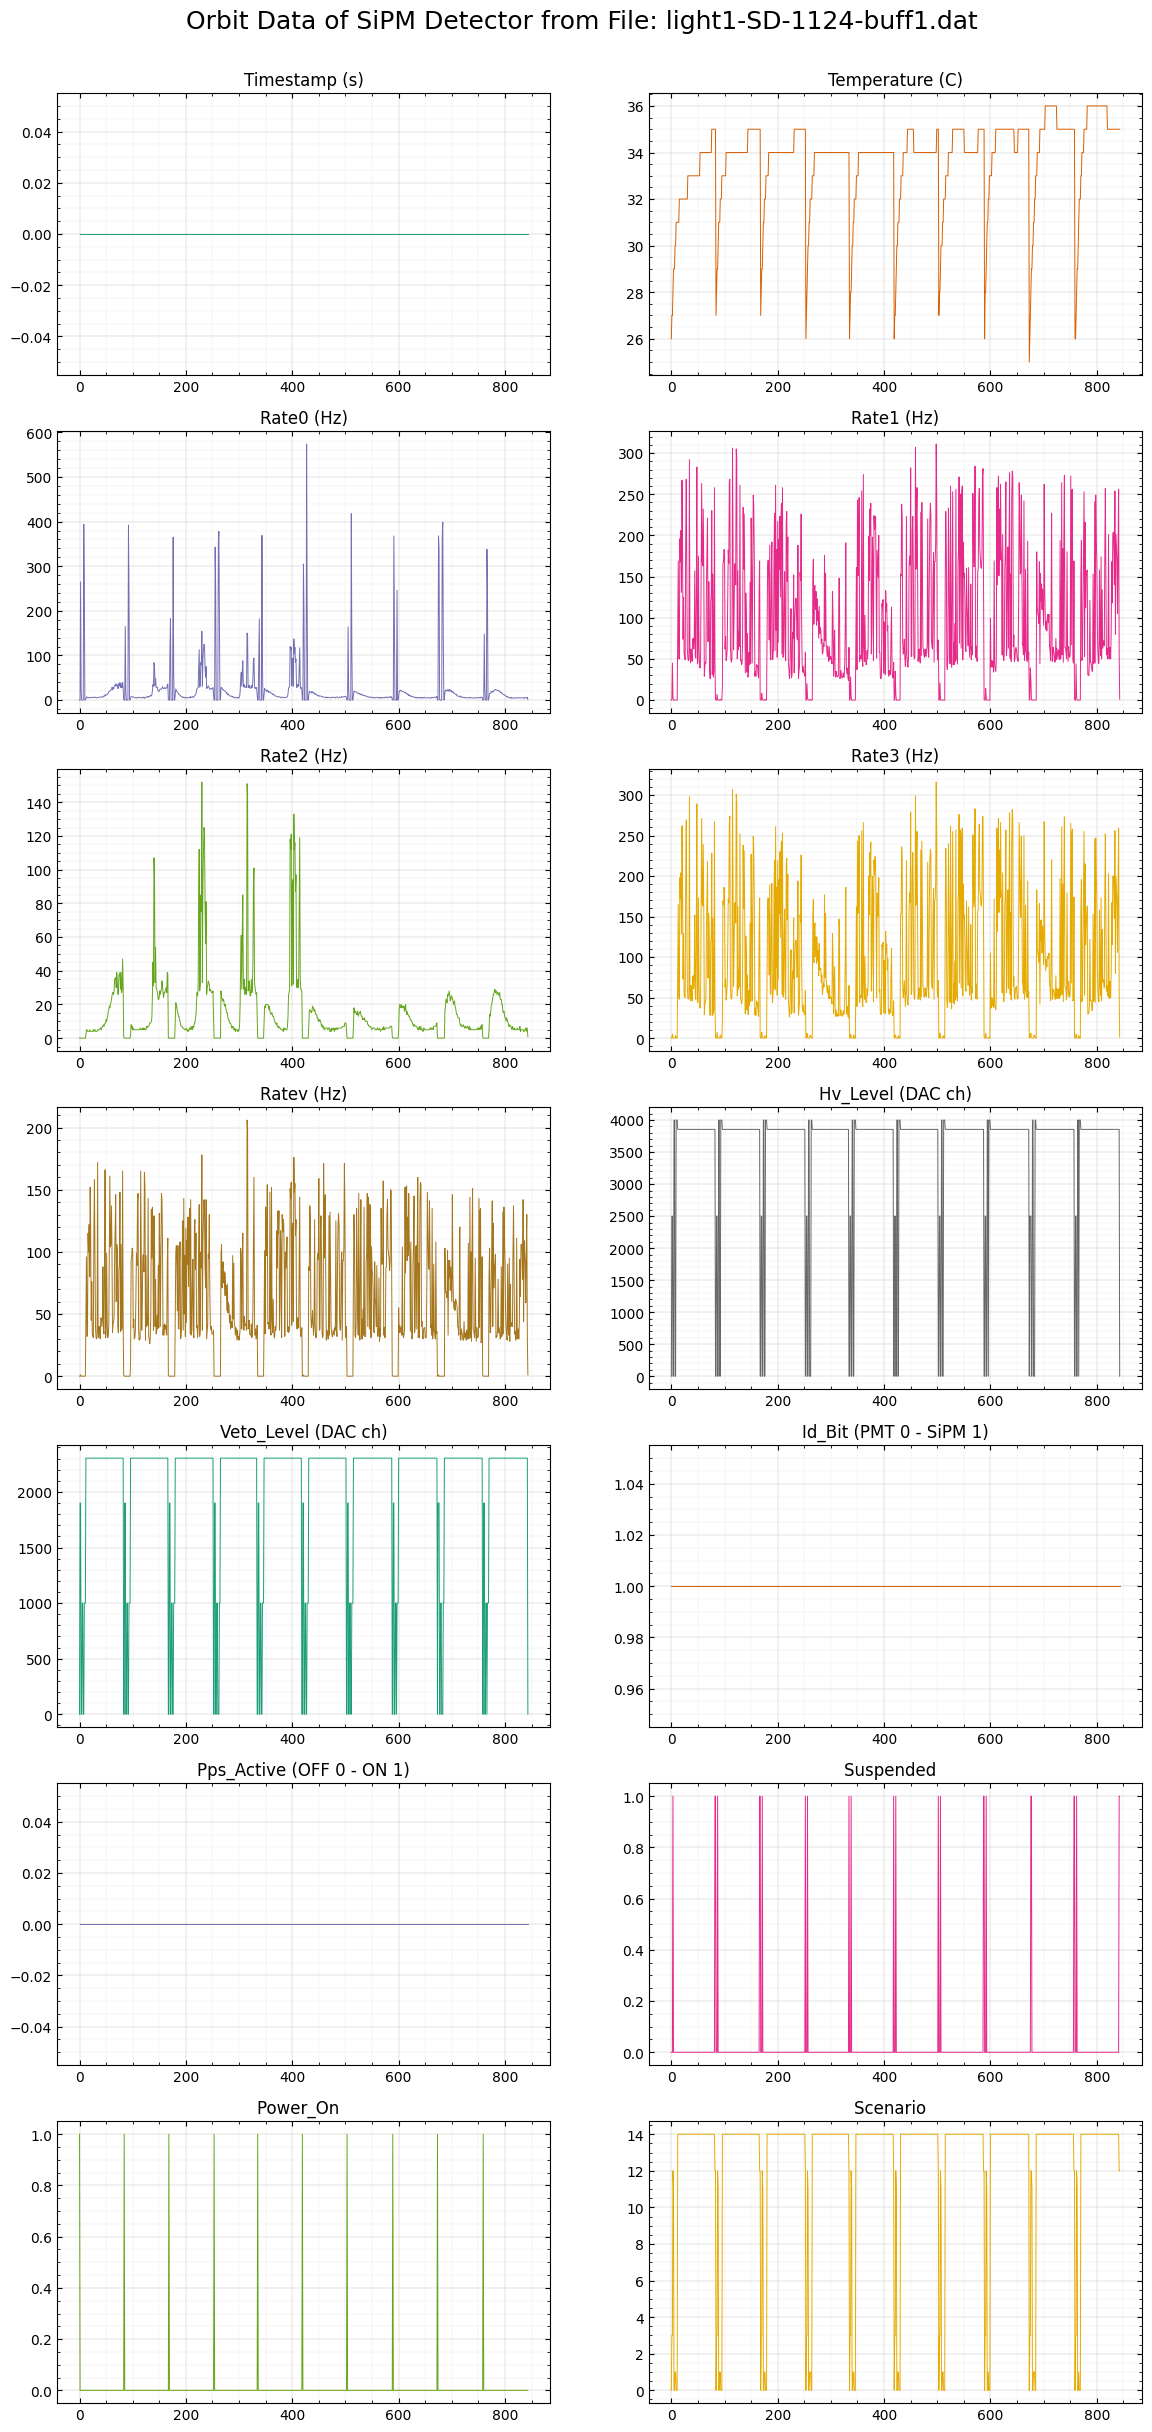

In [5]:
# Print the SiPM Data
fig, axes = rp.plot_buffer(data_SiPM, title = 'Orbit Data of SiPM Detector from File: '+ fname,UNITS=rp.ORBIT_UNITS)

# Pick a buffer and display it

Then get a buffer corresponding to this orbit data and plot it.


- BUFFER 1 - Orbit Data
- BUFFER 2 - TGF SiPM
- BUFFER 3 - TGF PMT
- BUFFER 4 - Non Veto SiPM
- BUFFER 5 - Non Veto PMT
- BUFFER 6 - Veto SiPM
- BUFFER 7 - Veto PMT
- BUFFER 8 - Reserved SiPM
- BUFFER 9 - Reserved PMT

In [6]:
# NONVETO BUFFERS

# Directory of the buffer
buffer_fname = raw_dir + SD + '/light1-'+SD+'-buff4.dat'

# Decode the buffer data in a dictionary
data         = rp.get_dict(buffer_fname,struct=rp.NONVETO_STRUCT,MAX=100000,STUPID=True)

Line:   0%|          | 0/100000 [00:00<?, ?it/s]

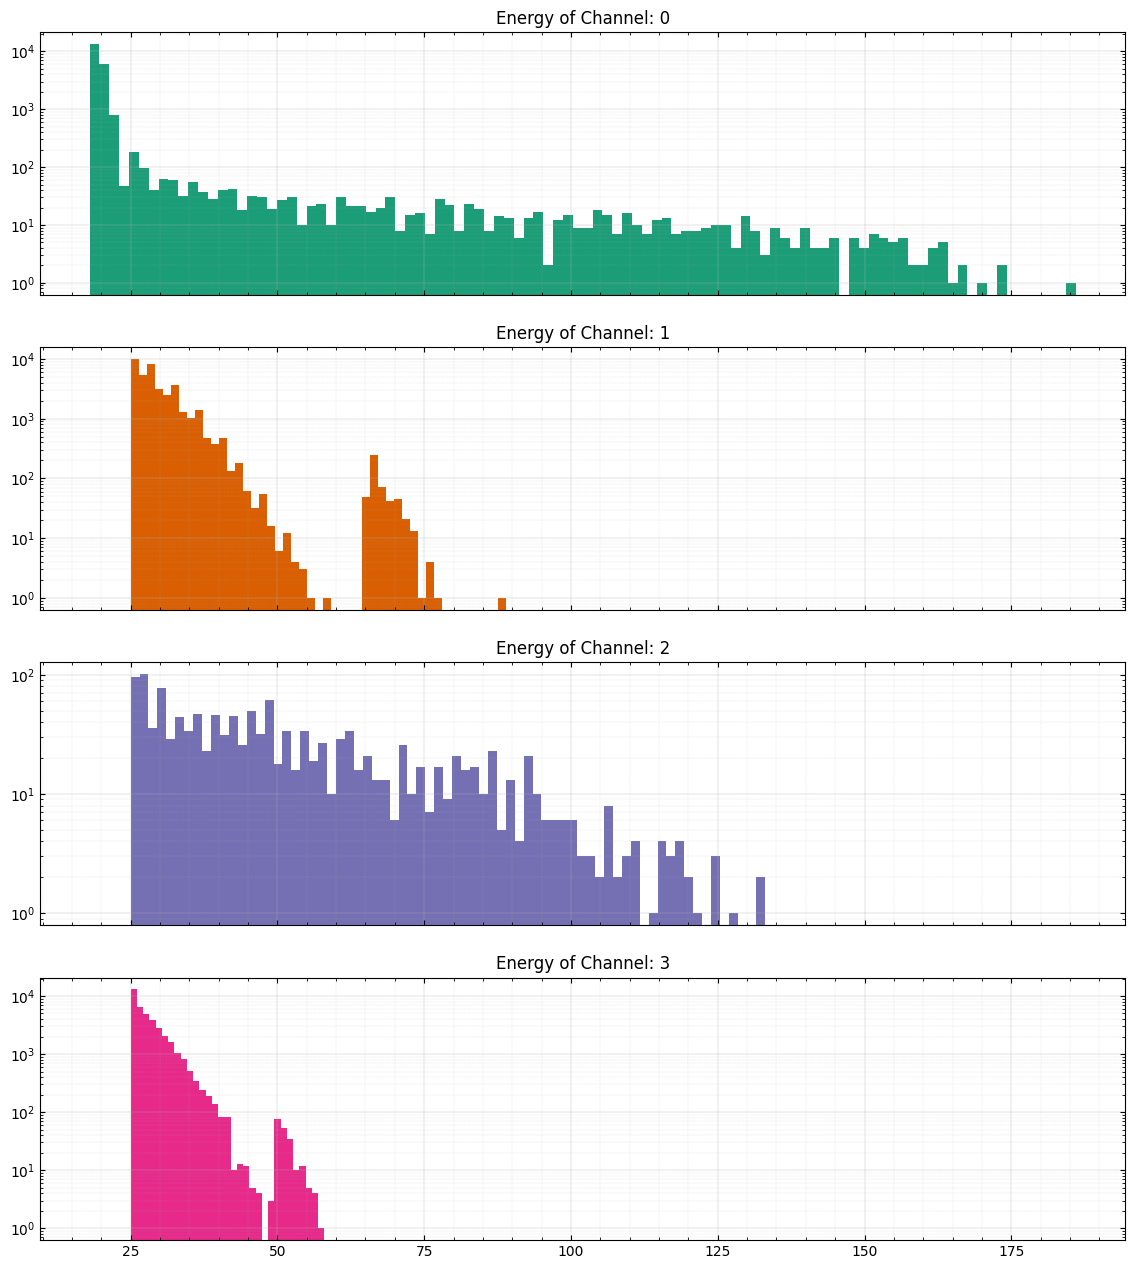

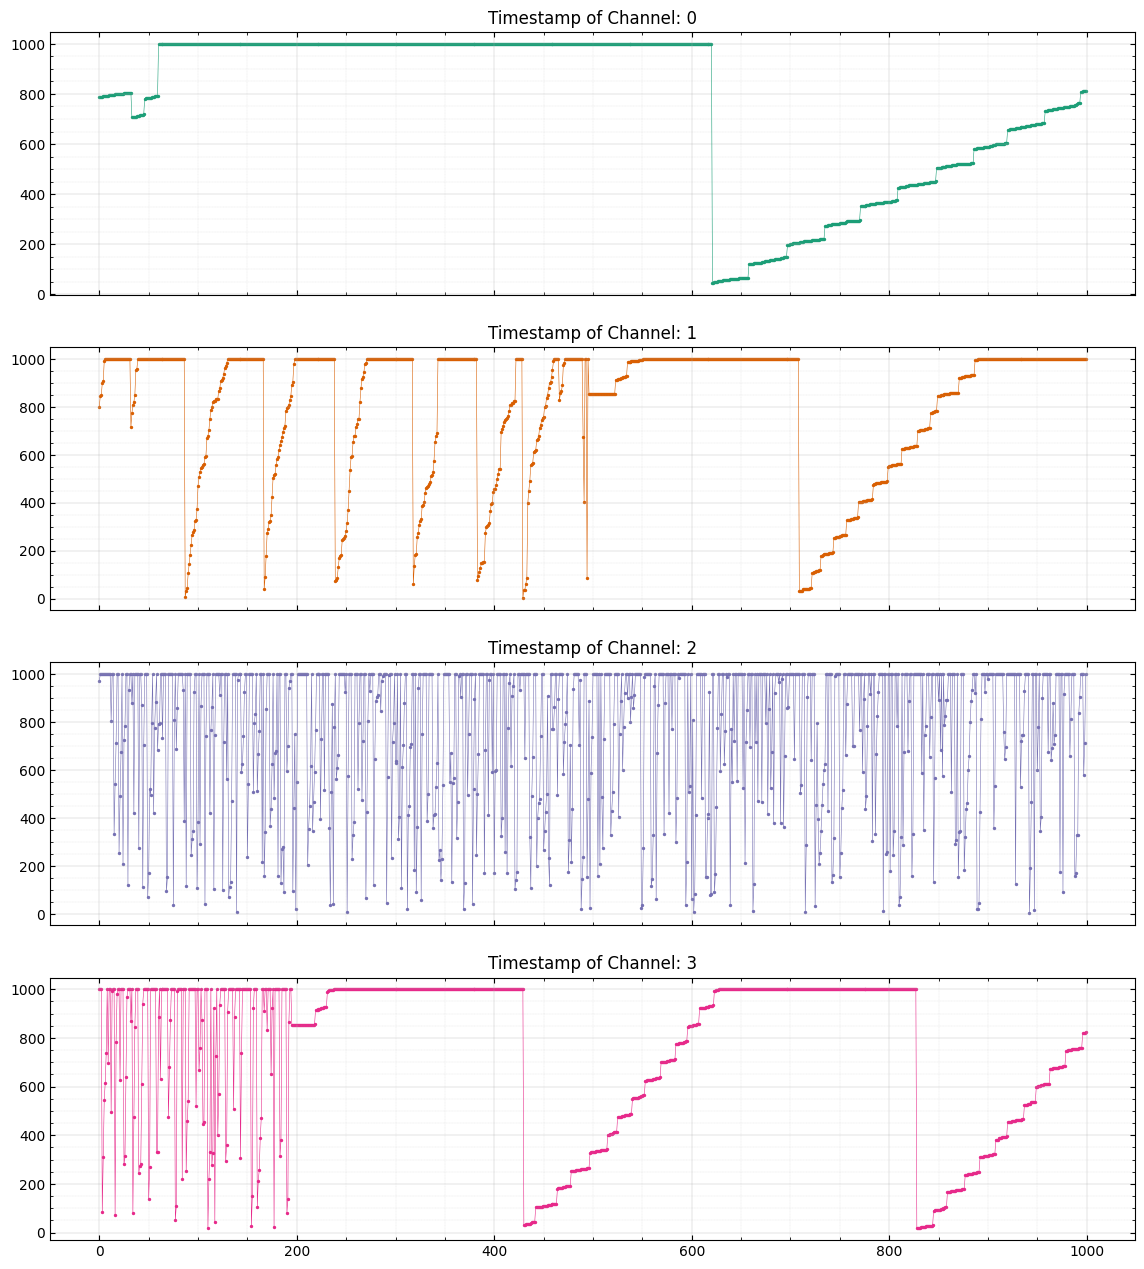

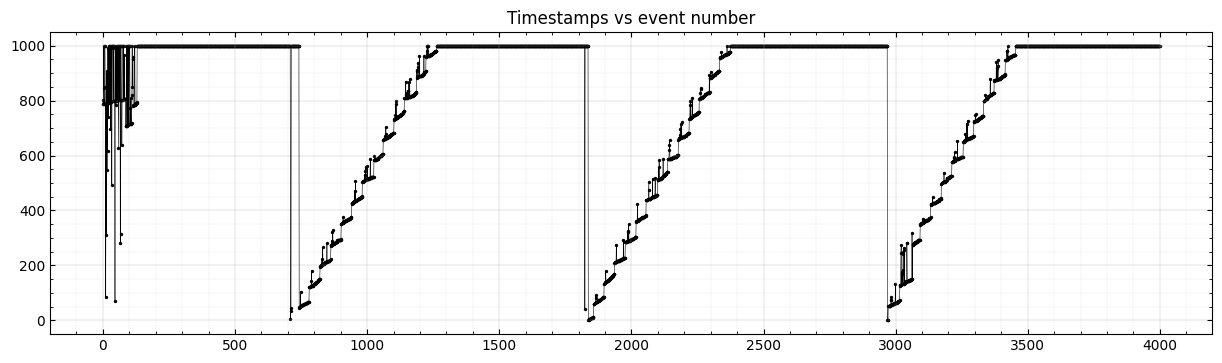

In [16]:
# Plot the buffers details

# Histograms
rp.plot_hists(data, rp.NONVETO_STRUCT,bins=100);

# Timestamps
rp.plot_timestamps(data, rp.NONVETO_STRUCT,RANGE=(0,1000));

# Full timestamp
rp.plot_timestamp(data, RANGE=(0,4*1000));

# Now perform the analysis

First we collect the valid data, i.e. we correct the range of data based solely on their timestmaps 